# Lab | Handling Data Imbalance in Classification Models

Jorge Castro DAPT NOV 2021

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')

In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [5]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churnData['TotalCharges'].value_counts(dropna=False)
churnData['Churn']=churnData['Churn'].replace("Yes",1)
churnData['Churn']=churnData['Churn'].replace("No",0)

In [7]:
churnData['TotalCharges']=churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean())

In [8]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# X/y Split

X = churnData.drop('Churn', axis=1)
y = churnData['Churn']

# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
# Splitting my numerical values

X_train_num = X_train[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
X_test_num = X_test[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.340191,-0.435476,-0.514314,-0.462171
1,0.883210,2.296336,0.017840,0.555404
2,-1.196572,-0.435476,-0.819594,-0.950644
3,1.168670,-0.435476,-1.483535,-0.441989
4,-0.829552,-0.435476,0.658427,-0.539130


In [11]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

LR = LogisticRegression(random_state=32, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print("score: ",LR.score(X_test_scaled, y_test))

score:  0.7830777967064169


<AxesSubplot:>

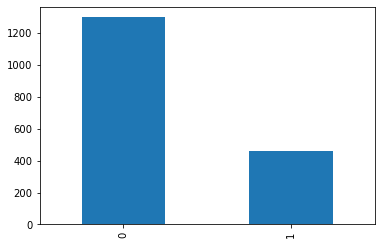

In [12]:
# Checking for data imbalance
count_classes = y_test.value_counts()
count_classes.plot(kind = 'bar')

### Downsampling

In [13]:
from sklearn.utils import resample

category_0 = churnData[churnData['Churn'] == 0]
category_1 = churnData[churnData['Churn'] == 1]

category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [14]:
print(category_0_undersampled.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [15]:
churn_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
churn_downsampled['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [16]:
# X/y Split

X = churn_downsampled.drop('Churn', axis=1)
y = churn_downsampled['Churn']

# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# Splitting my numerical values

X_train_num = X_train[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
X_test_num = X_test[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.161640,-0.466516,-1.645973,-0.628806
1,-1.126930,-0.466516,-1.517364,-0.939610
2,-0.877529,-0.466516,0.039844,-0.716557
3,-0.794395,-0.466516,-0.789161,-0.758353
4,-0.711262,2.143551,1.513630,-0.404113


In [18]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

LR = LogisticRegression(random_state=32, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print("score: ",LR.score(X_test_scaled, y_test))

score:  0.7262032085561497


### Upsampling

In [19]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [20]:
print(category_0.shape)
print(category_1_oversampled.shape)

(5174, 16)
(5174, 16)


In [21]:
churn_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)
churn_upsampled['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [22]:
# X/y Split

X = churn_upsampled.drop('Churn', axis=1)
y = churn_upsampled['Churn']

# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
# Splitting my numerical values

X_train_num = X_train[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
X_test_num = X_test[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.454483,-0.484608,-1.489565,-0.764597
1,-1.119749,-0.484608,0.060102,-0.908025
2,1.333421,-0.484608,-1.671573,-0.423074
3,-0.703958,2.063524,0.247310,-0.584739
4,1.167104,-0.484608,0.457052,1.177223


In [24]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

LR = LogisticRegression(random_state=32, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print("score: ",LR.score(X_test_scaled, y_test))

score:  0.7267104754541941
